# Урок 2. Создание признакового пространства

## Подключение библиотек

In [1]:
!pip install razdel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from collections import Counter
from string import punctuation
from razdel import tokenize

In [26]:
import warnings 
warnings.filterwarnings(action = 'ignore')

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [49]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Conv1D, GRU, LSTM, Dropout, SimpleRNN

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras.backend import clear_session
from keras.models import Sequential
from keras import layers

## Загрузка и подготовка данных

In [51]:
positive = pd.read_csv('/content/drive/MyDrive/positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
positive

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive
...,...,...
114906,"Спала в родительском доме, на своей кровати......",positive
114907,RT @jebesilofyt: Эх... Мы немного решили сокра...,positive
114908,"Что происходит со мной, когда в эфире #proacti...",positive
114909,"""Любимая,я подарю тебе эту звезду..."" Имя како...",positive


In [52]:
negative = pd.read_csv('/content/drive/MyDrive/negative.csv', sep = ';', usecols = [3], names = ['text'])
negative['label'] = ['negative'] * len(negative)
negative

,text,label
0,на работе был полный пиддес :| и так каждое за...,negative
1,"Коллеги сидят рубятся в Urban terror, а я из-з...",negative
2,@elina_4post как говорят обещаного три года жд...,negative
3,"Желаю хорошего полёта и удачной посадки,я буду...",negative
4,"Обновил за каким-то лешим surf, теперь не рабо...",negative
...,...,...
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative


In [53]:
df = positive.append(negative)
df.head()

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive


## Задание 1

Задание: обучите три классификатора:

1) на токенах с высокой частотой

2) на токенах со средней частотой

3) на токенах с низкой частотой

Сравните полученные результаты, оцените какие токены наиболее важные для классификации.

In [54]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

### Определение частоты токенов

In [55]:
corpus = [token.text for text in df.text for token in tokenize(text) if token.text not in punctuation]
print(len(corpus))
corpus[:10]

3135394


['first_timee', 'хоть', 'я', 'и', 'школота', 'но', 'поверь', 'у', 'нас', 'то']

In [56]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('не', 69603),
 ('и', 55347),
 ('я', 53243),
 ('в', 53038),
 ('RT', 38080),
 ('на', 35812),
 ('t', 33561),
 ('http', 33072),
 ('co', 33041),
 (':(', 32776)]

In [57]:
vec = CountVectorizer(ngram_range=(1, 1), min_df=1000)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.63      0.63      0.63     27832
    positive       0.64      0.64      0.64     28877

    accuracy                           0.64     56709
   macro avg       0.64      0.64      0.64     56709
weighted avg       0.64      0.64      0.64     56709



In [58]:
vec = CountVectorizer(ngram_range=(1, 1), min_df=100, max_df=1000)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.56      0.70      0.62     22385
    positive       0.77      0.64      0.70     34324

    accuracy                           0.67     56709
   macro avg       0.67      0.67      0.66     56709
weighted avg       0.69      0.67      0.67     56709



In [59]:
vec = CountVectorizer(ngram_range=(1, 1), max_df=100)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.73      0.66      0.69     30989
    positive       0.63      0.71      0.67     25720

    accuracy                           0.68     56709
   macro avg       0.68      0.68      0.68     56709
weighted avg       0.69      0.68      0.68     56709



Токены со средней частотой лучше в определении позитивных сообщений, а с меньшей частотой (до 100 в корпусе) - негативных. При использовании часто встречающихся токенов f1 score падает.

## Задание 2

найти фичи с наибольшей значимостью, и вывести их

In [60]:
feature_importances = clf.coef_[0]
feature_importances

array([ 0.97210325,  0.15344714,  0.54537873, ..., -0.14515005,
       -0.14515005, -0.27712338])

In [61]:
feature_names = vec.get_feature_names()

In [62]:
df_imp = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
df_imp = df_imp.sort_values('importance', ascending=False)
df_imp['feature'][:30].tolist()

['отличного',
 'ddddd',
 'dtoropova',
 'прекрасного',
 'смеха',
 'улыбнуло',
 'ахахахахаха',
 'кайфую',
 'читатель',
 'прекрасны',
 'умница',
 'gregwest_',
 'полезно',
 'ахахахахах',
 'поздравляем',
 'хехе',
 'juljulianapai',
 'polinamilicevic',
 'аххах',
 'забавно',
 'шикарное',
 'довольная',
 'порадовали',
 'ураааа',
 'omega777oleg',
 'улыбкой',
 'vxt6clfpdd',
 'удачного',
 'fkirkorov',
 'вечернийургант']

## Задание 3

1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера

3) убедиться что для сетки нет переобучения

### CountVectorizer

In [63]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.76      0.76      0.76     28146
    positive       0.76      0.77      0.77     28563

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



### TfidfVectorizer

In [64]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.73      0.77      0.75     26628
    positive       0.79      0.75      0.77     30081

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



### HashingVectorizer

In [65]:
vec = HashingVectorizer(n_features=4)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.40      0.52      0.45     21817
    positive       0.63      0.52      0.57     34892

    accuracy                           0.52     56709
   macro avg       0.52      0.52      0.51     56709
weighted avg       0.55      0.52      0.53     56709



### Подбор оптимального размера для HashingVectorizer

In [78]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [80]:
n_features = range(2, 50, 3)

In [81]:
pipeline = Pipeline(steps=[('vec', HashingVectorizer()),
                           ('clf', LogisticRegression())])

In [82]:
parameters = dict(vec__n_features=n_features)

In [83]:
gs = GridSearchCV(pipeline, parameters)
gs.fit(df.text, df.label)

GridSearchCV(estimator=Pipeline(steps=[('vec', HashingVectorizer()),
                                       ('clf', LogisticRegression())]),
             param_grid={'vec__n_features': range(2, 50, 3)})

In [84]:
gs.best_score_

0.5751033690552952

In [85]:
print('Best number of features:', gs.best_estimator_.get_params()['vec__n_features'])

Best number of features: 44


C помощью GridSearchCV удалось подобрать оптимальный размер HashingVectorizer - 44

### Нейронная сеть

In [66]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.text)
sequences = tokenizer.texts_to_sequences(df.text)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 3340 2953  527]
 [   0    0    0 ...  178  121   20]
 [   0    0    0 ... 3903   26   40]
 ...
 [   0    0    0 ...  221   27   53]
 [   0    0    0 ...    6    1 2354]
 [   0    0    0 ...    5   16   36]]


In [67]:
labels = np.where(df.label == 'positive', 1, 0)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(tweets, labels)

In [69]:
clear_session()

In [73]:
embedding_dim = 20

In [74]:
model = Sequential()
model.add(layers.Embedding(input_dim=max_words, 
                           output_dim=embedding_dim, 
                           input_length=max_len))
model.add(layers.LSTM(embedding_dim))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 20)           100000    
                                                                 
 lstm (LSTM)                 (None, 20)                3280      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 103,301
Trainable params: 103,301
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(x_train, y_train,
                    epochs=3,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=500)

Epoch 1/3
341/341 [==============================] - 87s 247ms/step - loss: 0.5611 - accuracy: 0.7108 - val_loss: 0.4916 - val_accuracy: 0.7555
Epoch 2/3
341/341 [==============================] - 91s 266ms/step - loss: 0.4762 - accuracy: 0.7651 - val_loss: 0.4819 - val_accuracy: 0.7607
Epoch 3/3
341/341 [==============================] - 91s 268ms/step - loss: 0.4651 - accuracy: 0.7709 - val_loss: 0.4791 - val_accuracy: 0.7619


In [76]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 0.7824
Testing Accuracy:  0.7619


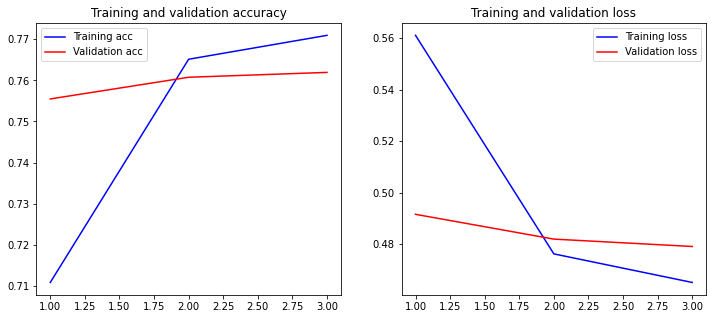

In [77]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)